In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import random

In [4]:
df = pd.read_csv ('IMDb_movies.csv', low_memory=False)
df = df.dropna(subset=['imdb_title_id', 'actors', 'genre', 'country', 'avg_vote']) # Limpa rows com NaN
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [5]:
subdf = df[['imdb_title_id', 'title', 'actors', 'country', 'genre', 'avg_vote']]
subdf.head()

,imdb_title_id,title,actors,country,genre,avg_vote
0,tt0000009,Miss Jerry,"Blanche Bayliss, William Courtenay, Chauncey D...",USA,Romance,5.9
1,tt0000574,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...",Australia,"Biography, Crime, Drama",6.1
2,tt0001892,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...","Germany, Denmark",Drama,5.8
3,tt0002101,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",USA,"Drama, History",5.2
4,tt0002130,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Italy,"Adventure, Drama, Fantasy",7.0


### Create the general network

In [38]:
network = nx.DiGraph()
for ind in subdf.index:
    movie = subdf['title'][ind] + " MOVIE"
    this_cast = [x.strip() for x in subdf['actors'][ind].split(',')]
    genre = [x.strip() for x in subdf['genre'][ind].split(',')]
    country = [x.strip() for x in subdf['country'][ind].split(',')]
    rating = subdf['avg_vote'][ind]
    network.add_node(movie, genre=genre, country=country, rating=rating)
    for actor in this_cast:
        network.add_edge(actor, movie)
        

True


In [7]:
# Network Size
print(network.nodes['Il manuale del giovane avvelenatore MOVIE'])
print(f'Nodes: {len(network.nodes())} \n'
      f'Edges: {len(network.edges())}')

{'genre': ['Crime', 'Drama'], 'country': ['UK', 'Germany', 'France'], 'rating': 7.1}
Nodes: 499021 
Edges: 1154172


### Two hops ego network as subgraph of general network of Scarlett Johansson

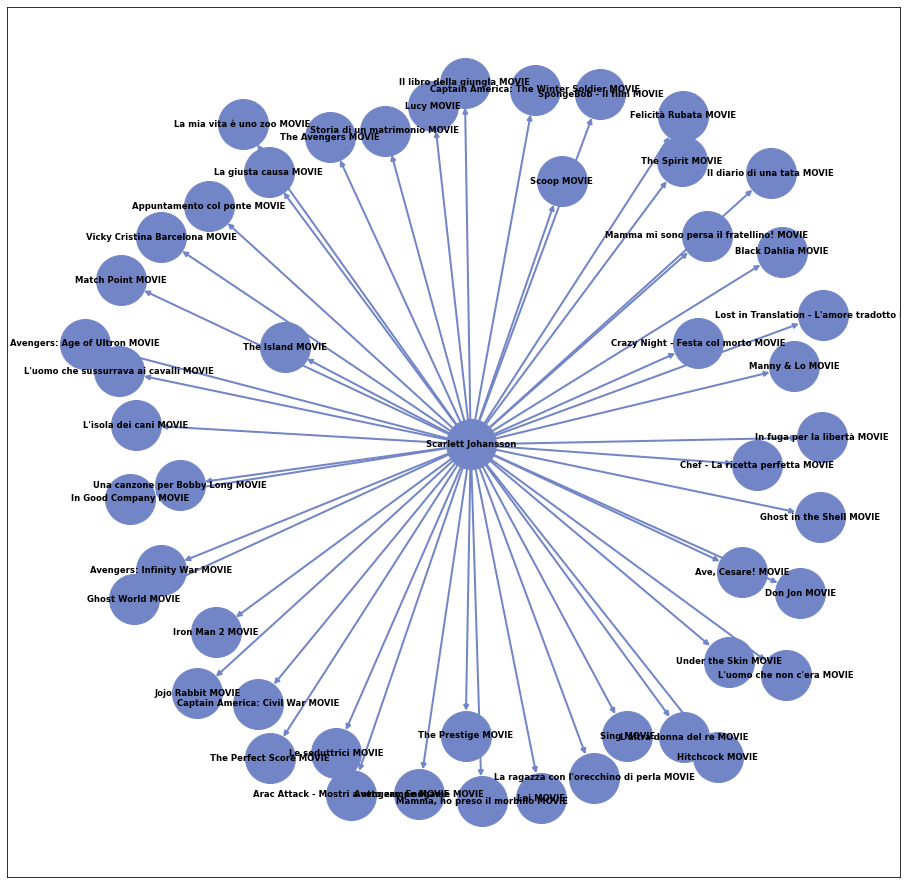

In [6]:
ego = nx.ego_graph(network, 'Scarlett Johansson')
pos = nx.spring_layout(ego, k=0.2, iterations=20)
plt.figure(figsize=(16,16))
opt = {
    'node_color': '#7285C7',
    'width': 2,
    'edge_color': '#7285C7',
    'font_size':8.5,
    'font_weight': 'bold'
}
nx.draw_networkx(ego, pos, node_size=2500, **opt)

### The Iron Man 2 digraph ego network [from: Scarllet Johansson]

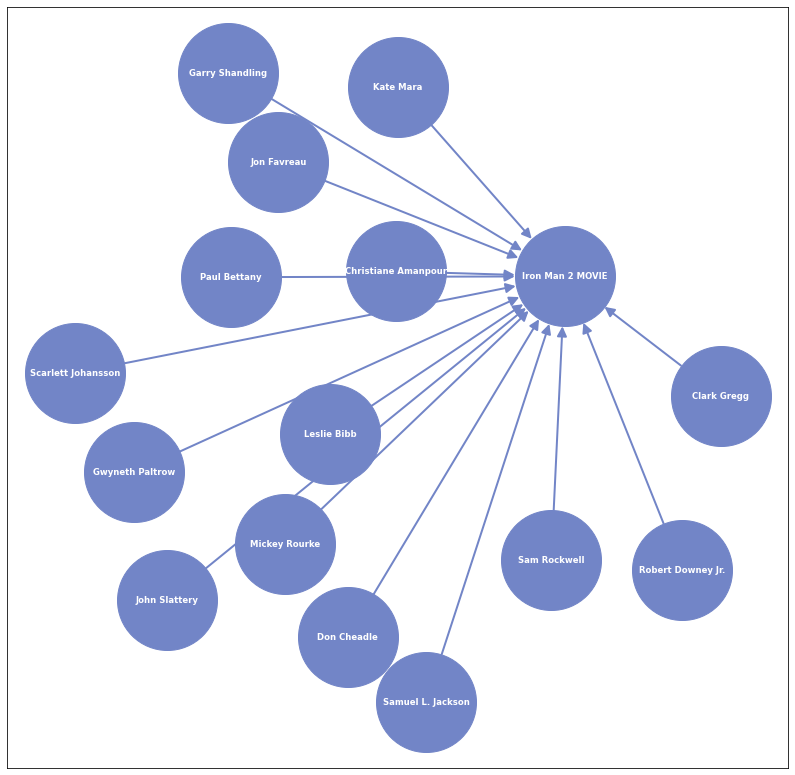

In [103]:
iron_man2 = nx.DiGraph()
iron_man2.add_edges_from(network.in_edges(['Iron Man 2 MOVIE']))
pos = nx.spring_layout(iron_man2, k=0.2, iterations=20)
plt.figure(figsize=(14,14))

options = {
    'node_size': 10000,
    'node_color': '#7285C7',
    'width': 2,
    'arrowsize': 20,
    'edge_color': '#7285C7',
    'font_size':8.5,
    'font_color': 'white',
    'font_weight': 'bold'
}

nx.draw_networkx(iron_man2, pos, **options)

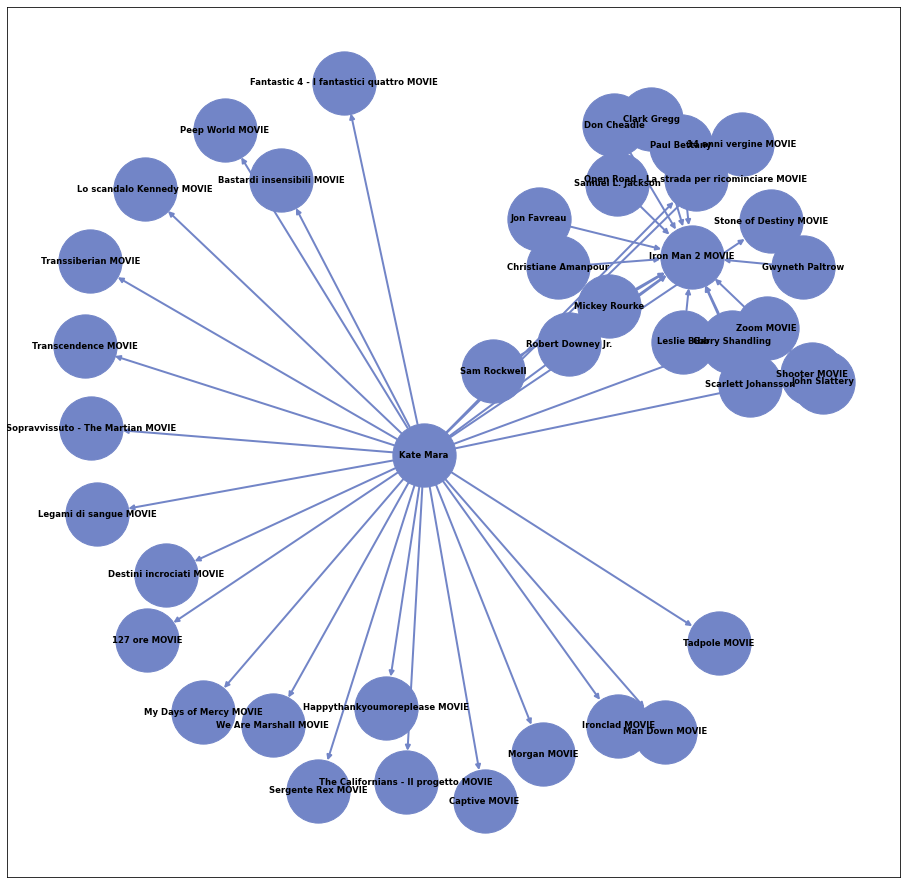

In [8]:
# full network of iron man 2 and its actors egonetworks 
# import copy 
# edges = copy.deepcopy(iron_man2.edges())
# for actor in edges:
#     node = actor[0]
#     iron_man2.add_edges_from(network.out_edges([node]))

"""
Select one actor of iron man 2 cast to expand the plot 
and show that the general network scales with multiple
ego network of its actors parts on movies 
"""


iron_man2.add_edges_from(network.edges(['Kate Mara']))

# Newplot with Kate Mara film networks
pos = nx.spring_layout(iron_man2, k=0.4, iterations=40)
plt.figure(figsize=(16,16))
nx.draw_networkx(iron_man2, pos, node_size=4000, **opt)

### Start clustering actors by country

In [9]:
data = []
for node in network.nodes():
    out_degree = network.out_degree(node)
    if out_degree > 0:
        row = {
            'actor': node,
            'out_degree': out_degree
        }
        data.append(row)
degree_df = pd.DataFrame(data, columns = ['actor', 'out_degree'])

In [10]:
""" Get only the actors with out_degree above average """

od_mean = round(degree_df['out_degree'].mean())
degree_df = degree_df.query('out_degree > @od_mean')
degree_df.head()

,actor,out_degree
14,Frank Mills,8
16,Asta Nielsen,4
50,J.P. McGowan,7
51,Pola Negri,12
52,Emil Jannings,18


In [11]:
for i in degree_df.index:
    actor = degree_df['actor'][i]
    film = list(network.out_edges(actor)) 
    for job in film: 
        for country in network.nodes[job[1]]['country']:
            if country not in degree_df.columns:
                degree_df[country] = 0
            count = degree_df[country][i] + 1
            degree_df[country][i] = count

<ipython-input-11-2dd419672d96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_df[country][i] = count


KeyboardInterrupt: 

In [ ]:
degree_df.head()

In [ ]:
def plotbar_df(df, country):
    ct_df = df.query(f'{country} > 0')
    ct_df = ct_df[['actor', 'out_degree', country]]
    ct_df = ct_df.sort_values(by=[country], ascending=False)

    return ct_df

countries = ['USA', 'UK', 'France', 'Germany', 'India', 'Brazil']
df_plot = []
for country in countries:
    df_plot.append(plotbar_df(degree_df, country))

In [ ]:
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=2,
                   subplot_titles=countries,
                    horizontal_spacing=0.16)

row, col = 1, 1
for i in range(len(countries)):
    my_df, loc = df_plot[i], countries[i]
    fig.add_trace(
        go.Bar(
            x=my_df[loc][:5],
            y=my_df['actor'][:5],
            orientation='h'
        ),
        row, col
    )
    col += 1
    if col > 2:
        row += 1
        col = 1

fig.update_layout(showlegend=False,
                  height=800, width=900,
                  title_text="Actors Films in Country",
                  font=dict(size=10))
fig.show()
# fig.write_image("images/actor_bycountry.png", engine="kaleido")

### Cossine similarity of an actor ego network

In [ ]:
def handle_str(v1, v2):
    str_comp = list(set(v1 + v2))
    nv1 = [0] * len(str_comp)
    nv2 = [0] * len(str_comp)
    
    for v in v1: 
        if v in str_comp:
            i = str_comp.index(v)
            nv1[i] = 1
            
    for v in v2: 
        if v in str_comp:
            i = str_comp.index(v)
            nv2[i] = 1

    return nv1, nv2

def cos_sim(v1, v2):
    """cos_sim(v1,v2) defined as: 
    (v1 dot v2)/{||v1||*||v2||)"""
    
    v1v2 = np.dot(v1, v2)
    v1v1 = np.dot(v1, v1)
    v2v2 = np.dot(v2, v2)
    
    resp = v1v2 / (np.sqrt(v1v1 * v2v2))
    
    return resp

v1 = ['Action', 'Comedy', 'Adventure']
v2 = ['Action', 'Adventure', 'Comedy']

nv1, nv2 = handle_str(v1, v2)
cos_sim(nv1, nv2)

In [ ]:
brazil = df_plot[5]
# for i in df_plot[5].index[:5]:
#     print(brazil['actor'][i])

def matrix_of_sim(actor):
    actors_mvs = [x[1] for x in network.out_edges(actor)]
    n_mvs = len(actors_mvs)

    SIM_M = np.array([[0] * n_mvs] * n_mvs, dtype=float)

    for i in range(0, n_mvs):
        for j in range(0, n_mvs):
            k, l = actors_mvs[i], actors_mvs[j]

            v1 = network.nodes[k]['genre']
            v2 = network.nodes[l]['genre']

            nv1, nv2 = handle_str(v1, v2)
            SIM_M[i, j] = cos_sim(nv1, nv2)
    
    return SIM_M

In [ ]:

select_actors = []
for c_df in df_plot:
    country = list(c_df.columns)[2]
    max_value = c_df[country] ==  c_df[country].max()
    name = c_df[max_value] # ator/atriz que mais fez filmes no país
    select_actors.append(name['actor'].values[0])

    
print(select_actors)


In [ ]:
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(12,12))
axes = [axs[0, 0], axs[0, 1],
        axs[1, 0], axs[1, 1],
        axs[2, 0], axs[2, 1]]

for i, actor in enumerate(select_actors):
    M = matrix_of_sim(actor)

    sns.heatmap(M, square=True,
                xticklabels=False,
                yticklabels=False,
                ax=axes[i])
    axes[i].set_title(f'{actor} - {countries[i]}')
    
# eric_r = matrix_of_sim('Eric Roberts')
# print(np.mean(eric_r))
# renato_a = matrix_of_sim('Renato Aragão')
# print(np.mean(renato_a))
# plt.savefig('images/actors_matrix_of_sim.png')

### Recommend based on [categoria? filme c melhor rating do ator?]

### Cossine similarity between countries actors 

### Merge with ratings df

### Shortest path of an actor to another by transforming the digraph in graph

In [ ]:
# netUndirected = network.to_undirected()

# print([p for p in nx.all_shortest_paths(netUndirected, 'Morgan Freeman', 'Renato Aragão') if 'Morgan Freeman' in p])
# print([p for p in nx.all_shortest_paths(netUndirected, 'Morgan Freeman', 'Renato Aragão')])
# a = [p for p in nx.all_shortest_paths(netUndirected, 'Morgan Freeman', 'Renato Aragão')]
# b = [p for p in nx.all_shortest_paths(netUndirected, 'Renato Aragão', 'Morgan Freeman')]


# """
# em uma interação x, temos N nós novos em G

# LV X acha caminho de 3 nós

# roda TODOS os caminhos

# para CADA caminho, verifica QUANTOS nós ja estão em G, guarda melhor resultado

# SE em algum momento antes de terminar de rodar TODOS caminhos, atingir 3 ja em G PARA, ENCERRA ANTES DE ACABAR
    
# """

In [127]:
netUndirected = network.to_undirected()
aux = [p for p in nx.all_shortest_paths(netUndirected, 'Morgan Freeman', 'Jamie Foxx')]
print(aux[0])
aux2 = [p for p in nx.all_shortest_paths(netUndirected, 'Scarlett Johansson', 'James Woods')]
print(aux2[0])


['Morgan Freeman', 'Uno scomodo testimone MOVIE', 'James Woods', 'Ogni maledetta domenica MOVIE', 'Jamie Foxx']
['Scarlett Johansson', 'La giusta causa MOVIE', 'Ed Harris', 'Gli intrighi del potere - Nixon MOVIE', 'James Woods']


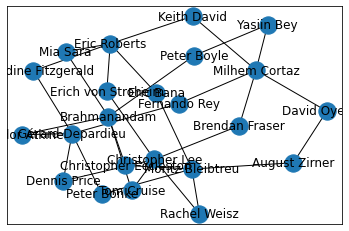

In [130]:
def handle_list(lista):
#     for element in lista:
#         element.pop(0)
#         element.pop(-1)
    for path in lista:
        for element in path:
            if 'MOVIE' in element:
                path.remove(element)
    return lista

def choose_best_path(graph, lista):
    recurring_nodes = 0
    for i, path in enumerate(lista):
        index_path = 0
        x = 0
        for element in path:
            if graph.has_node(element):
                x+=1
        if x > recurring_nodes:
            recurring_nodes = x
            indice_result = i
            
    if recurring_nodes == 0:
        return lista[random.randrange(len(lista))]
    else:
        return lista[index_path]
    print(grafo.nodes)

def create_edges(source, dest, greedy_path):
    ntk.add_edge(source, greedy_path[0])
    for i in range(len(greedy_path)-1):
        curr_node = greedy_path[i]
        next_node = greedy_path[i+1]
        ntk.add_edge(curr_node, next_node)
    ntk.add_edge(dest, greedy_path[-1])
    
netUndirected = network.to_undirected()

list_actors = []
list_actors.append('Eric Roberts')
list_actors.append('Christopher Lee')
list_actors.append('Gérard Depardieu')
list_actors.append('Moritz Bleibtreu')
list_actors.append('Brahmanandam')
list_actors.append('Milhem Cortaz')

# list_actors.append('Scarlett Johansson')
# list_actors.append('Morgan Freeman')
# list_actors.append('James Woods')

ntk = nx.Graph()

for actor in list_actors:
    ntk.add_node(actor)
for index in range(len(list_actors)):
    for index2 in range(index+1, len(list_actors)):
        source = list_actors[index]
        dest = list_actors[index2]
        paths = [p for p in nx.all_shortest_paths(netUndirected, source, dest)]
        paths = handle_list(paths)
        greedy_path = choose_best_path(ntk, paths)
        ntk.add_nodes_from(greedy_path)
        create_edges(source, dest, greedy_path)
        
nx.draw_networkx(ntk)